베이스 라인 코드    
[초보 중에서도 초보를 위한 베이스라인](https://www.dacon.io/competitions/official/235736/codeshare/2680?page=1&dtype=recent)

# 데이터 로드

In [6]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

In [7]:
# Import 패키지
import numpy as np  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# 데이터 로드 (인코딩은 euc-kr)
path = './data/'
train=pd.read_csv(path + 'train.csv', encoding='euc-kr')
test=pd.read_csv(path +'test.csv', encoding='euc-kr')
submission=pd.read_csv(path + 'sample_submission.csv', encoding='euc-kr')

print('train:', train.shape, 'test:',test.shape, 'submission:', submission.shape)

train: (122400, 10) test: (10080, 9) submission: (10080, 2)


In [9]:
train.columns = ['num', 'date_time', 'target', 'temperature', 'wind', 'humid','rain', 'sun_time', 'Non-electric_cfo', 'solar_power']
test.columns = ['num', 'date_time',  'temperature', 'wind', 'humid',
       'rain', 'sun_time', 'Non-electric_cfo', 'solar_power']

In [10]:
train.head(7)

,num,date_time,target,temperature,wind,humid,rain,sun_time,Non-electric_cfo,solar_power
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
5,1,2020-06-01 05,8010.576,16.9,3.4,93.0,0.0,0.0,0.0,0.0
6,1,2020-06-01 06,7978.176,16.7,3.4,90.0,0.1,0.0,0.0,0.0


In [11]:
train.isnull().sum()

num                 0
date_time           0
target              0
temperature         0
wind                0
humid               0
rain                0
sun_time            0
Non-electric_cfo    0
solar_power         0
dtype: int64

In [12]:
test.head()  # test set 결측치 : 0,3,6,9,12,15,18,21 이외 데이터가 존재하지 않음

,num,date_time,temperature,wind,humid,rain,sun_time,Non-electric_cfo,solar_power
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
test.isnull().sum()

num                    0
date_time              0
temperature         6720
wind                6720
humid               6720
rain                8400
sun_time            6720
Non-electric_cfo    7784
solar_power         8456
dtype: int64

In [14]:
round(test.isnull().sum()/10080,3)*100

num                  0.0
date_time            0.0
temperature         66.7
wind                66.7
humid               66.7
rain                83.3
sun_time            66.7
Non-electric_cfo    77.2
solar_power         83.9
dtype: float64

기온, 풍속, 습도, 강수량 일조 외에도
비전기냉방설비운영(77.2%)과 태양광 보유(83.9%)의 값도 결측이 존재

# 데이터 탐색 및 전처리

In [15]:
# test 결측치 전처리 하기
def interpolate_linear(df, columns):
    for col in columns:
        df.loc[:, col]=  df[col].interpolate(method='linear', axis = 0)
    return df.isnull().sum()

In [16]:
interpolate_linear(test,['num', 'date_time', 'temperature', 'wind', 'humid', 'rain', 'sun_time'])

num                    0
date_time              0
temperature            0
wind                   0
humid                  0
rain                   0
sun_time               0
Non-electric_cfo    7784
solar_power         8456
dtype: int64

### Test 데이터 셋의 비전기냉방설비운영과 태양강보유의 결측치가 있음  
-> id별로 train의 값을 가져와서 test에서 보간해줌

In [17]:
# id 별로 test의 비전기냉방설비운영과 태양광보유를 보간\
train[['num', 'Non-electric_cfo','solar_power']]
non_electrics={}
solar={}
count=0
for i in range(0, len(train), len(train)//60): # 한 건물당 2040의 time date 존재
    count +=1
    non_electrics[count]=train.loc[i,'Non-electric_cfo']
    solar[count]=train.loc[i,'solar_power']

for i in range(len(test)):
    test.loc[i, 'Non-electric_cfo']=non_electrics[test['num'][i]]
    test.loc[i, 'solar_power']=solar[test['num'][i]]

Text(0.5, 1.0, 'Test_set')

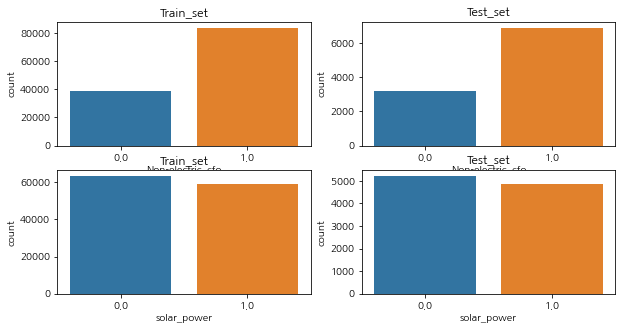

In [18]:
fig, axes = plt.subplots(2,2, figsize = (10,5)) # 1row X 2 columns

sns.countplot(ax = axes[0][0], x = 'Non-electric_cfo', data = train)
axes[0][0].set_title('Train_set')

sns.countplot(ax = axes[0][1], x = 'Non-electric_cfo', data = test)
axes[0][1].set_title('Test_set')

sns.countplot(ax = axes[1][0], x = 'solar_power', data = train)
axes[1][0].set_title('Train_set')

sns.countplot(ax = axes[1][1], x = 'solar_power', data = test)
axes[1][1].set_title('Test_set')


![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/14aa075f-77c9-443b-81f2-a07c4a3adf92/Untitled.png](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/14aa075f-77c9-443b-81f2-a07c4a3adf92/Untitled.png)

-> 대체로 상대 수치가 비슷하므로  ESS 설비가 있을 것이라 유추

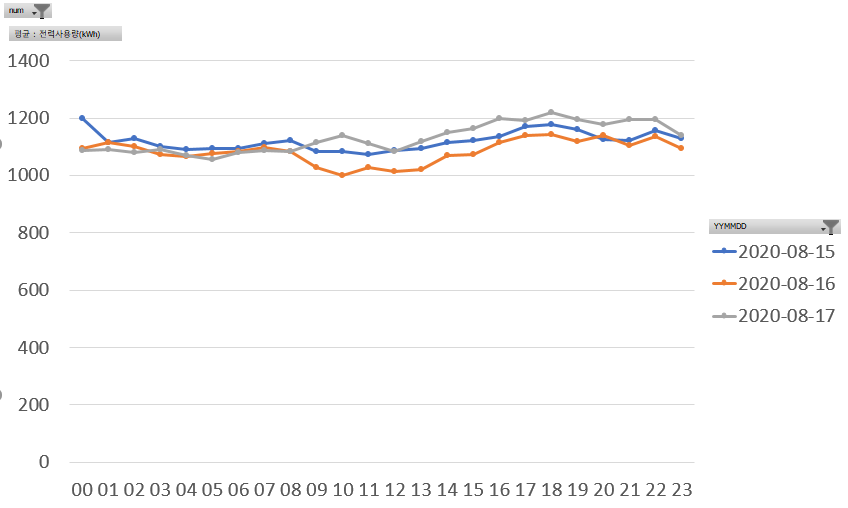

휴일과 주말을 대체적으로 비슷한 추이




In [19]:
# 시간, 요일, 주말여부(new!) 추가
def time(x):
    return int(x[-2:])

train.loc[:,'time']=train.loc[:,'date_time'].apply(lambda x: time(x))
test.loc[:,'time']=test.loc[:,'date_time'].apply(lambda x: time(x))

In [20]:
# 평일=0~4, 주말=5~6
def weekday(x):
    return pd.to_datetime(x[:10]).weekday()
train['weekday']=train['date_time'].apply(lambda x :weekday(x))
test['weekday']=test['date_time'].apply(lambda x :weekday(x))

# 평일=0, 주말=1
train['weekend']=train['weekday'].apply(lambda x: 0 if x < 4 else 1)
test['weekend']=test['weekday'].apply(lambda x: 0 if x < 4 else 1)

In [21]:
train.loc[train.date_time.str.contains('2020-08-17'),  'weekend'] = 1
train.drop(['date_time'], axis = 1, inplace = True)

## 파생변수 생성

기온에 따라 전력 소비량의 차이가 존재하는데, 기온이 올라갈 수록 에어컨을 틀어서 전력 소비량이 증가하는 듯하다.  
그러나 기온이외에도 습도 등으로 차이가 존재하는 듯 하니, 불쾌지수를 파생변수를 두어 분석 해 볼 예정  


* 체감온도(℃) = 13.12 + 0.6215 × T - 11.37 V0.16 + 0.3965 V0.16 × T

[T는 기온(℃), V는 풍속(km/h)]
-> 풍속(m/s)기준이므로 단위 변환 필요 

* 불쾌지수 = 0.4 ×（건구 화씨온도 +습구 화씨 온도）+ 15 (화씨온도식)
= 0.72 × (건구 섭씨온도 + 습구 섭씨온도 ) + 40.6 (섭씨온도식) 으로 계산한다.
= 0.81 * 섭씨온도 +0.01 * 상대습도(%)（0.99*섭씨온도 - 14.3）+ 46.3ㅁ

In [22]:
import math
def get_pow(series):
    return math.pow(series, 0.15)

train['perceived_temperature'] = 13.12 + 0.6215*train['temperature'] - 11.37*train['wind'].apply(get_pow) + 0.3965*train['wind'].apply(get_pow)*train['wind']
train['discomfort_index'] = 1.8*train['temperature'] - 0.55*(1-train['wind'])*(1.8*train['temperature']-26) + 32



test['perceived_temperature'] = 13.12 + 0.6215*test['temperature'] - 11.37*test['wind'].apply(get_pow) + 0.3965*test['wind'].apply(get_pow)*test['wind']
test['discomfort_index'] = 1.8*test['temperature'] - 0.55*(1-test['wind'])*(1.8*test['temperature']-26) + 32

In [23]:
# 불쾌지수 : https://www.kma.go.kr/HELP/basic/help_01_05.jsp
def split_discomfort_index(index):
    if index >= 80 :
        return 3
    elif index >= 75 : 
        return 2
    elif index >= 68 :
        return 1
    else :
        return 0

In [24]:
train.loc[:,'discomfort_index_flg']=train.loc[:,'discomfort_index'].apply(split_discomfort_index)

## 데이터 탐색

<AxesSubplot:>

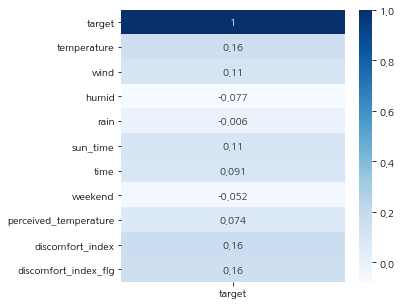

In [25]:
Corr = train.drop(['num', 'Non-electric_cfo', 'solar_power','weekday' ], axis =1).corr()
plt.figure(figsize = (5,5))
sns.heatmap(Corr.loc[:,['target']],cmap = 'Blues', annot = True)

In [26]:
df_53 = train[train.num == 53]

<AxesSubplot:xlabel='time', ylabel='target'>

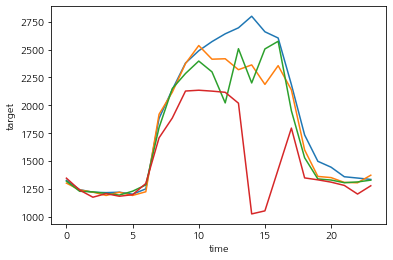

In [27]:
sns.lineplot(x= 'time', y = 'target', data = df_53.loc[df_53['discomfort_index_flg'] == 3].groupby('time').max())
sns.lineplot(x= 'time', y = 'target', data = df_53.loc[df_53['discomfort_index_flg'] == 2].groupby('time').max())
sns.lineplot(x= 'time', y = 'target', data = df_53.loc[df_53['discomfort_index_flg'] == 1].groupby('time').max())
sns.lineplot(x= 'time', y = 'target', data = df_53.loc[df_53['discomfort_index_flg'] == 0].groupby('time').max())

<AxesSubplot:xlabel='time', ylabel='target'>

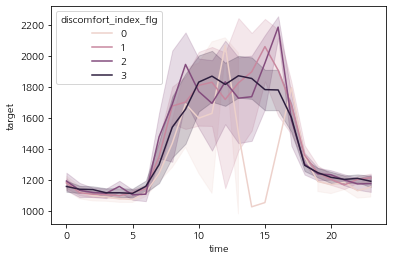

In [28]:
sns.lineplot(x = 'time', y ='target', data = df_53, hue = 'discomfort_index_flg')

<AxesSubplot:xlabel='temperature', ylabel='target'>

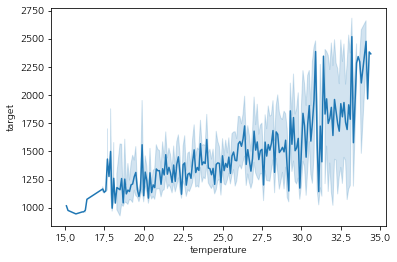

In [29]:
sns.lineplot(x = 'temperature', y = 'target', data = df_53)

불쾌지수를 구간화 한 변수로 그린 그래프를 파악해보면, 불쾌지수로 설명되지 못하는 듯하여 max, min의 범위가 차이가 크다

###  낮 시간대 인지 아닌지에 대한 파생변수 생성


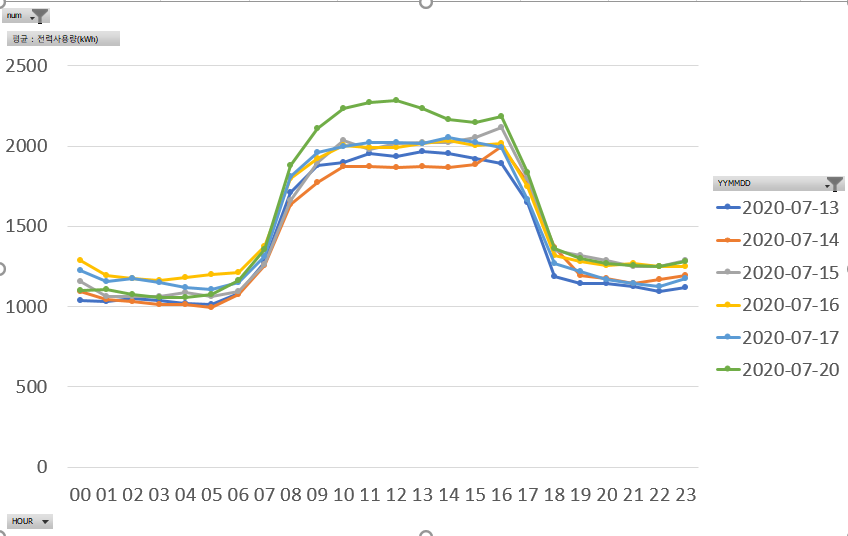

In [30]:
def time_split(time):
    time = int(time)
    if time >= 9 and time <= 17:
        return 1
    else : 
        return 0
    
train.loc[:,'business_hour']=train.loc[:,'time'].apply(time_split)

In [31]:
train.loc[:,'business_hour']=train.loc[:,'time'].apply(time_split)

df_53 = train[train.num == 53]

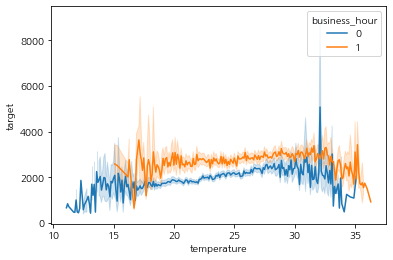

<AxesSubplot:xlabel='temperature', ylabel='target'>

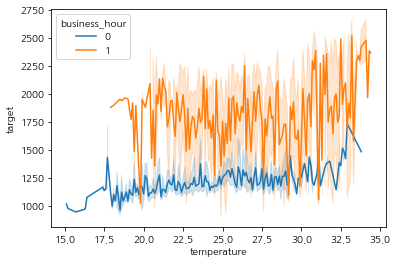

In [32]:
sns.lineplot(x = 'temperature', y = 'target', data = train, hue ='business_hour')
plt.show()
sns.lineplot(x = 'temperature', y = 'target', data = df_53, hue ='business_hour')

In [74]:
train_x=train.drop(['target', 'temperature', 'humid','wind','discomfort_index', 'Non-electric_cfo', 'solar_power','discomfort_index'], axis=1)  # 문제
train_y=train[['target']]  # 정답

In [75]:
df_x_53 = train_x[train_x.num == 53].drop(['num'], axis = True)
df_y_53 = train_y[train_x.num == 53]
x_train_53 = df_x_53.iloc[192:-72,] # 6월 9일부터 8월 21일까지
x_test_53 = df_x_53.iloc[-72:,]
y_train_53 = df_y_53.iloc[192:-72,]['target']
y_test_53 = df_y_53.iloc[-72:,]['target']

In [87]:
from sklearn.decomposition import PCA

In [99]:
def df2d_to_array3d(df_2d):
    feature_size=df_2d.iloc[:,2:].shape[1] # feature : id, date_time 제외
    time_size=len(df_2d[''].value_counts()) # 시간의 개수
    sample_size=1 # 건물 번호의 개수
    return df_2d.iloc[:,2:].values.reshape([sample_size, time_size, feature_size]) 

df2d_to_array3d(x_train_53)

KeyError: 'date_time'

In [88]:
# pca

pca  = PCA(n_components =x_train_53.shape[0])
pca.fit(x_train_53)

ValueError: n_components=1776 must be between 0 and min(n_samples, n_features)=8 with svd_solver='full'

In [86]:
PCscore = pca.transform(x_train_53)
PCscore[0:5]

AttributeError: 'PCA' object has no attribute 'mean_'

/anaconda/envs/py38_tensorflow/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda/envs/py38_tensorflow/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


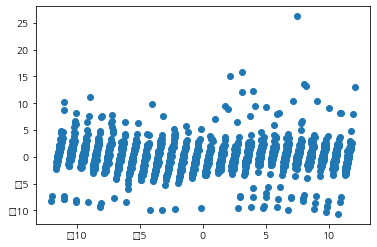

In [84]:
# PC score scatter
plt.scatter(PCscore[:,0],PCscore[:,1]) # 0-X축 / 1-Y축
plt.show()

# 모델링
## LightGBM
**LightGBM : 학습 오류에 대해 가중치를 더하면서 진행(Boosting 기법)**  
다른 tree 구조 알고리즘과 차이점은 leaf -wise로 수평적으로 확장(level-wise)하는 대신 수직적으로 확증하는 것으로 많은 데이터의 양에서도 속도가 빠르다는 장점이 있다. 그러나 다른 Tree 알고리즘 대비 과적합이 높은 편이므로 데이터의 양이 적을 경우 사용을 자제하는 것이 좋다

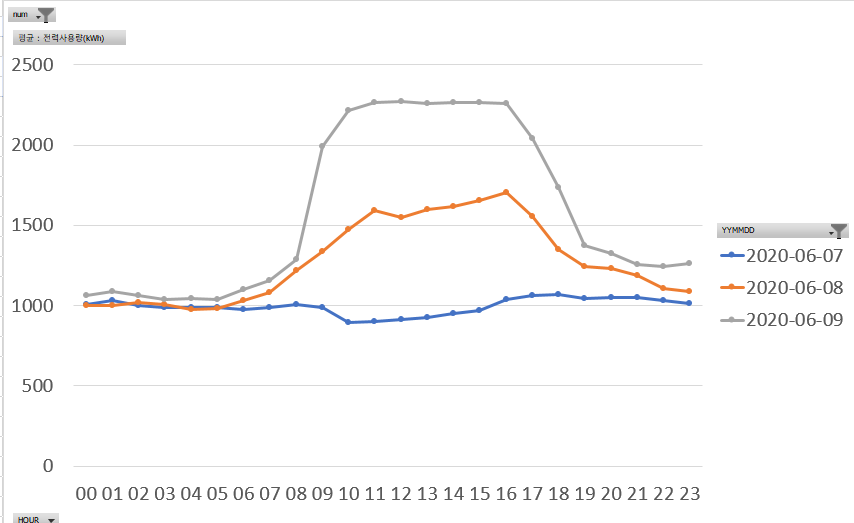

-> 냉방설비 가동 전의 데이터는 삭제

## 파생변수(체감온도, 불쾌지수, businesshour ) 추가하기 전
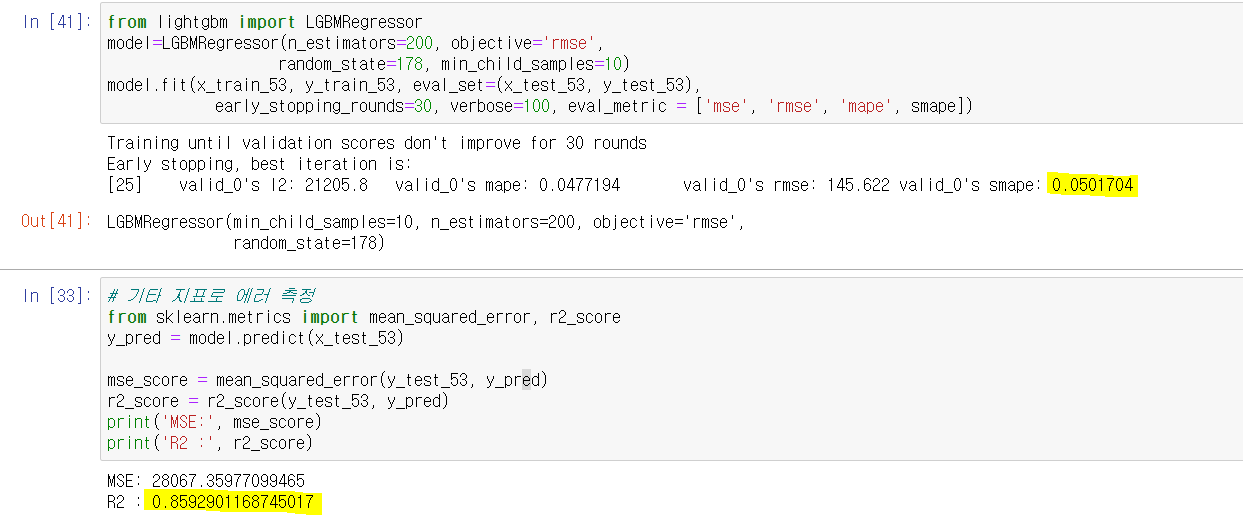


##  에어컨 틀지 않은 날 제거하기 전
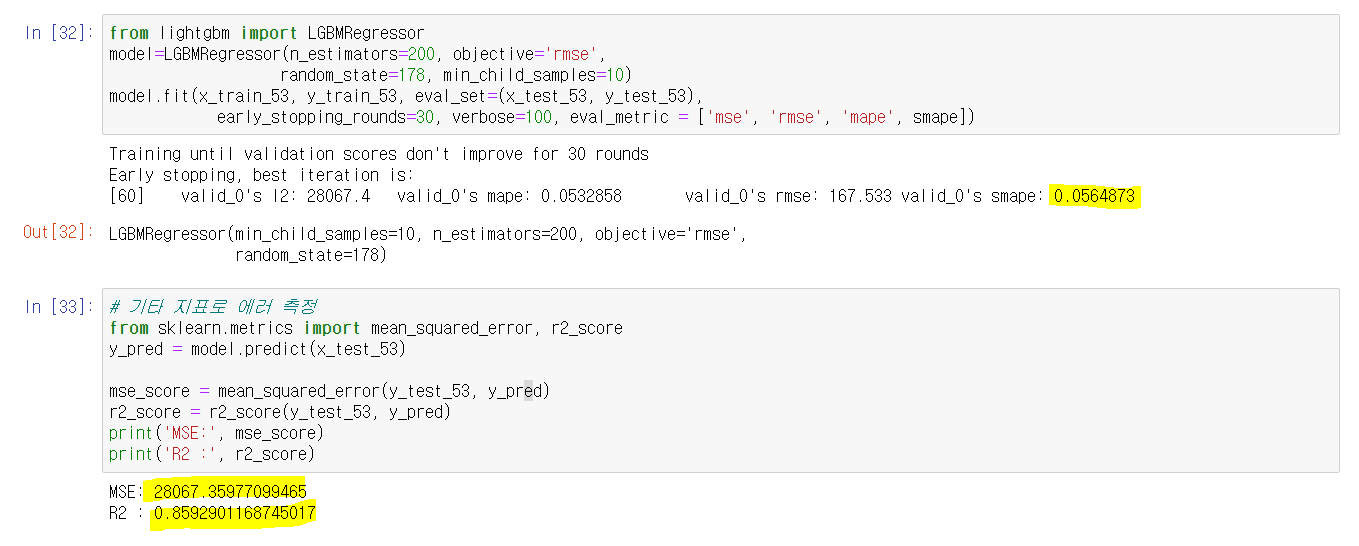





In [35]:
train_x.columns

Index(['num', 'rain', 'sun_time', 'time', 'weekday', 'weekend',
       'perceived_temperature', 'discomfort_index_flg', 'business_hour'],
      dtype='object')

In [36]:
df_x_53.columns

Index(['rain', 'sun_time', 'time', 'weekday', 'weekend',
       'perceived_temperature', 'discomfort_index_flg', 'business_hour'],
      dtype='object')

In [37]:
# loss function : SMAPE 정의
def smape(true, pred):
    true = np.array(true)  # np.array로 바꿔야 에러 없음
    pred = np.array(pred)
    eval_name = 'smape'
    eval_result = np.mean((np.abs(true-pred))/((np.abs(true) + np.abs(pred))/ 2))
    is_higher_better = False
    return (eval_name, eval_result, is_higher_better) # *2 , *100은 상수이므로 생략

In [38]:
# ============================================================================

In [39]:
from lightgbm import LGBMRegressor
model=LGBMRegressor(n_estimators=200, objective='rmse',
                   random_state=178, min_child_samples=10)
model.fit(x_train_53, y_train_53, eval_set=(x_test_53, y_test_53), 
            early_stopping_rounds=30, verbose=100, eval_metric = ['mse', 'rmse', 'mape', smape])

Training until validation scores don't improve for 30 rounds
[100]	valid_0's l2: 15311	valid_0's mape: 0.0440199	valid_0's rmse: 123.738	valid_0's smape: 0.0458824
Early stopping, best iteration is:
[111]	valid_0's l2: 14623.9	valid_0's mape: 0.0435745	valid_0's rmse: 120.929	valid_0's smape: 0.045363


LGBMRegressor(min_child_samples=10, n_estimators=200, objective='rmse',
              random_state=178)

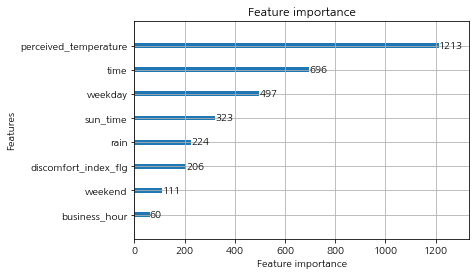

In [40]:
import lightgbm
lightgbm.plot_importance(model)
plt.show()

## 파라미터 조정

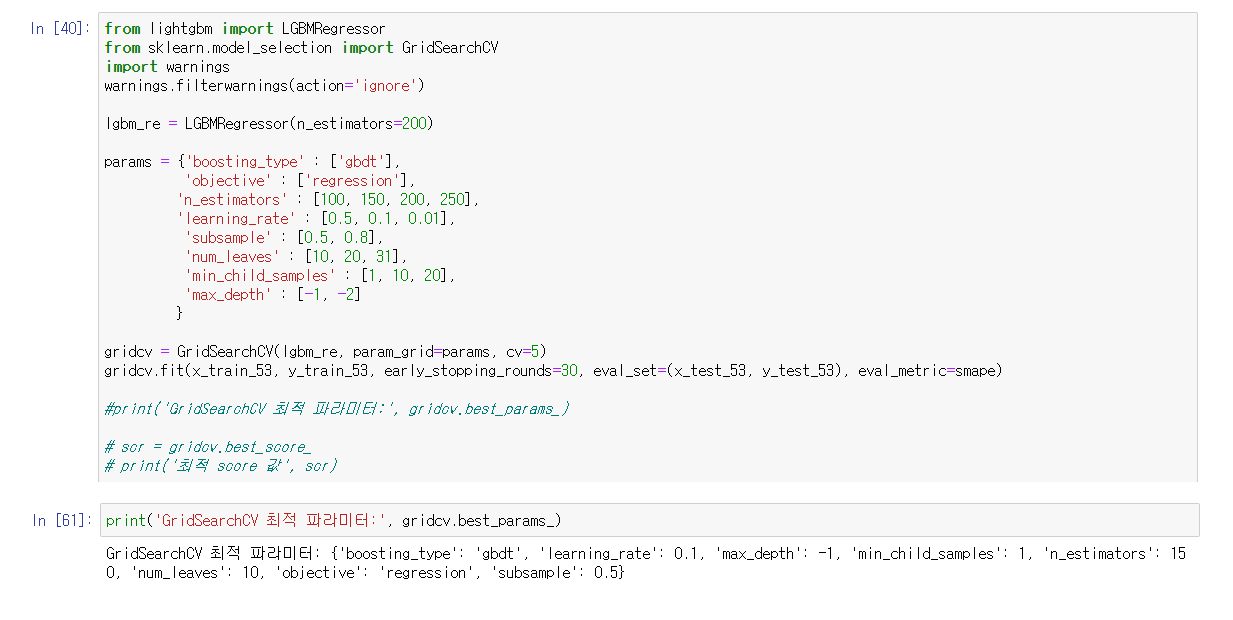

In [41]:
   from lightgbm import LGBMRegressor
model=LGBMRegressor(n_estimators=150, learning_rate=0.1, max_depth=-1, boosting_type='gbdt', num_leaves=10, objective='regression', subsample=0.5,
                   random_state=178, min_child_samples=1)
model.fit(x_train_53, y_train_53, eval_set=(x_test_53, y_test_53), 
            early_stopping_rounds=30, verbose=100, eval_metric = ['mse', 'rmse', 'mape', smape])

Training until validation scores don't improve for 30 rounds
[100]	valid_0's l2: 10033.2	valid_0's rmse: 100.166	valid_0's mape: 0.041845	valid_0's smape: 0.0433012
Early stopping, best iteration is:
[77]	valid_0's l2: 10251.3	valid_0's rmse: 101.249	valid_0's mape: 0.04168	valid_0's smape: 0.0431505


LGBMRegressor(min_child_samples=1, n_estimators=150, num_leaves=10,
              objective='regression', random_state=178, subsample=0.5)

In [42]:
# 기타 지표로 에러 측정
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test_53)

mse_score = mean_squared_error(y_test_53, y_pred)
r2_score = r2_score(y_test_53, y_pred)
print('MSE:', mse_score)
print('R2 :', r2_score)

MSE: 10251.305330033747
R2 : 0.9486072082788667


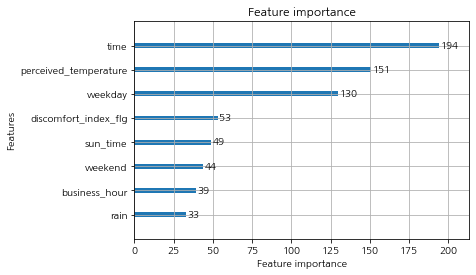

In [43]:
import lightgbm
lightgbm.plot_importance(model)
plt.show()

In [44]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(x_train_53, y_train_53)

RandomForestRegressor()

In [46]:
# 기타 지표로 에러 측정
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test_53)

mse_score = mean_squared_error(y_test_53, y_pred)
r2_score = r2_score(y_test_53, y_pred)
print('MSE:', mse_score)
print('R2 :', r2_score)

MSE: 10251.305330033747
R2 : 0.9486072082788667


In [47]:
def smape(true, pred):
    true = np.array(true)  # np.array로 바꿔야 에러 없음
    pred = np.array(pred)
    eval_name = 'smape'
    eval_result = np.mean((np.abs(true-pred))/((np.abs(true) + np.abs(pred))/ 2))
    is_higher_better = False
    return eval_result # *2 , *100은 상수이므로 생략

In [48]:
smape(y_test_53, y_pred)

0.043150505391206365